# Análisis descriptivo, predictivo y prescriptivo en una base de datos de características y precios de ventas de casas.

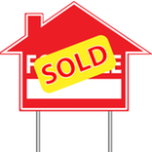

## Importar librerías

Al ser **python** un software modular (que separa las funcionalidades en grupos llamados módulos) para la mayoría de las actividades que se realizan es necesario importar diferentes librerías, en este caso importamos 

- pandas: la librería para manejar bases de datos
- matplotlib y seaborn: para visualizaciones
- Numpy: para manipular vectores, matrices y utilizar algunas funciones con números  
- stats: Contiene diversos paquetes estadísticos.
- math: Contiene funciones matemáticas.
- sklearn: Librería para ciencia de datos, de la cual se pueden obtener numerosas funciones como:

- train_test_split: sirve para dividir los datos en subconjuntos de entrenamiento y prueba que serán usados para entrenar y evaluar los modelos.  
    
- SimpleImputer: implementa una imputación de datos faltantes o no reconocibles a partir de la información contenida en la columna. 
    
- RandomForestRegressor: Modelo de regresión basado en el método de bosques aleatorios.
- GradientBoostingRegressor: Modelo de regresión basado en el método de Gradient Boosting.
- OneHotEncoder: Implementa One-Hot-Encoding, para convertir variables categóricas en dummies.
- LabelEncoder:  Implementa Label Encoding, para convertir variables categóricas en columnas de enteros.
- StandardScaler: Implementa la estandarización de las variables continuas
- mean_absolute_error: Error absoluto medio.
- r2_score: Calcula el R cuadrado.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

## Lectura y descripción de los datos

EL segundo paso es leer los datos y guardarlos en un dataframe. Para ejecutar por ti mismo este código deberás descargar las bases de datos "train.csv" y "test.csv" de los adjuntos y guardarlas en una carpeta llamada "data" dentro de la carpeta donde tienes este código. Debes asegurarte de escribir el directorio dentro de las funciones read_csv tal como está en tu computadora. 

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv') # Si esta línea te da error, asegúrate de colocar el directorio correcto dentro de la función read_csv.

Veamos más de cerca estas bases de datos. 
Observemos que "train" tiene 81 columnas, ya que contiene los precios de venta, mientras que "test" no tiene esta variable, la cual será construida cuando seamos capaces de predecirla.


In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

Definimos nuestra variable objetivo y usar la función shape para mostrar la cantidad de filas y columnas.

In [5]:
target = 'SalePrice'

In [6]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


En "train" tenemos 1460 filas, y en "test" 1459. Veamos las variables de cada una y comprobemos que son iguales.

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train.drop(columns= target).columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

## Preprocesamiento

Aquí veremos la limpieza de la base de datos para su posterior uso en un modelo de ML. Comencemos por eliminar columnas que no aporta información. 

In [10]:
df_train.drop(columns='Id',inplace=True)
df_test.drop(columns='Id',inplace=True)

### Datos faltantes

Busquemos las columnas que tienen un alto porcentaje de datos faltantes y procedamos a eliminarlas. 

In [11]:
def nullcolumns(df): 
    null_perc = df.isnull().mean()*100
    print(df.columns[null_perc > 60],'\n')
    df = df[df.columns[null_perc <= 60]]
    return df
    
df_train = nullcolumns(df_train)
df_test = nullcolumns(df_test)

print('Cantidad de columnas restantes en train',df_train.shape[1],'\n')
print('Cantidad de columnas restantes en test',df_test.shape[1])

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object') 

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object') 

Cantidad de columnas restantes en train 76 

Cantidad de columnas restantes en test 75


### Duplicados 

Comprobemos si hay datos duplicados. 

In [12]:
def duplicados(df):
    df.drop_duplicates(inplace=True)
    return df

df_train = duplicados(df_train)
df_test = duplicados(df_test)    

print('Cantidad de filas restantes en train',df_train.shape[0],'\n')
print('Cantidad de filas restantes en test',df_test.shape[0])

Cantidad de filas restantes en train 1460 

Cantidad de filas restantes en test 1459


### Tipo de variable

En esta sección seleccionaremos el tipo de variable, esta es importante para saber el tipo de descripción, análisis y transformaciones.

In [13]:
def tipovariable(df):
    categoricas = df.select_dtypes(exclude=np.number)
    numericas = df.select_dtypes(include=np.number)
    return categoricas, numericas
    
df_train_cat,df_train_num = tipovariable(df_train)
df_test_cat,df_test_num = tipovariable(df_test)  

print('Cantidad respectiva de variables categóricas y numéricas',len(df_train_cat.columns),len(df_train_num.columns))

Cantidad respectiva de variables categóricas y numéricas 39 37


### Imputación de datos faltantes
Aunque eliminamos las columnas que tienen una gran cantidad de datos nulos, algunas contienen aún NaN. Esto provoca errores en los modelos por tanto deben ser transformados. Usaremos para ello la técnica de [imputación simple](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), implementada  con el nombre de **SimpleImputer** en la librería **sklearn**. Para las columnas numéricas usaremos la estrategia de cambiar las entradas nulas por la media, y para las columnas categóricas la estrategia de cambiar las entradas nulas por el valor con mayor frecuencia absoluta. Al final, comprobamos si en efecto no quedan valores nulos en los dataframes.    

In [14]:
def impute_nullvalues_numerical(df): 
    imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
    df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
    return df

def impute_nullvalues_categorical(df): 
    imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
    df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)    
    return df

df_train_cat = impute_nullvalues_categorical(df_train_cat)
df_train_num = impute_nullvalues_numerical(df_train_num)
    
df_test_cat = impute_nullvalues_categorical(df_test_cat)
df_test_num = impute_nullvalues_numerical(df_test_num)

df_train_cat.columns[df_train_cat.isna().any()]

Index([], dtype='object')

# Clase 9

### Outliers o valores atípicos (variables numéricas)
En el caso de las variables numéricas, usaremos el rango intercuartílico para detectar y tratar los outliers. 
Contruimos una tabla que contiene la información del primer y tercer cuartil, el rango intercuartílico, y la cantidad de outliers superiores e inferiores, que los consideraremos como los valores que están a distancia mayor que 1.5 veces el rango intercuartílico del tercer cuartil y primer cuartil respectivamente. 

Tenemos varias opciones con estos valores extremos, una es eliminarlos, sin embargo, al hacer esto nos quedan sólo la tercera parte de los datos, aproximadamente. Estos son muy pocos datos, y de hecho nuestra base no es muy grande de inicio, así que aplicaremos otra técnica: sustituiremos los valores atípicos por los números "limite superior = tercer cuartil+1.5\*iqr" y "limite inferior = primer cuartil-1.5\*iqr" según corresponda.

*Nota: Como ejercicio descomenta la parte del código que elimina los outliers e imprime la cantidad de filas que quedan en la base de datos. Cuando avances a los modelos de Machine Learning puedes comparar los resultados eliminando los outliers vs los resultados aplicando la técnica propuesta.*  

In [15]:
def detectar_outliers_num(df):
    
    riq = pd.DataFrame(index=df.columns)
    indices = []
    for col in df.columns:
        riq.loc[col,'primer_cuartil'] = np.percentile(df[col],25) 
        riq.loc[col,'tercer_cuartil'] = np.percentile(df[col],75)
        riq.loc[col,'iqr'] = stats.iqr(df[col])   
        lim_sup = riq.loc[col,'tercer_cuartil']+riq.loc[col,'iqr']*1.5
        lim_inf = riq.loc[col,'primer_cuartil']-riq.loc[col,'iqr']*1.5
        riq.loc[col,'outliers_sup'] = len(df[df[col]>lim_sup])
        riq.loc[col,'outliers_inf'] = len(df[df[col]<lim_inf])          
#        indices += list(df[(df[col]>lim_sup) | (df[col]<lim_inf)].index)    
        for i in df.index:
            if  df.loc[i,col] > lim_sup:
                df.loc[i,col] = lim_sup
            elif df.loc[i,col] < lim_inf:
                  df.loc[i,col] = lim_inf        
#    df.drop(indices,inplace=True)
    return df, riq
    
df_train_num, informacion_train = detectar_outliers_num(df_train_num)   
df_test_num, informacion_test = detectar_outliers_num(df_test_num) 

print('La información sobre la cantidad de outliers la podemos ver en la tabla:','\n','\n', informacion_train,'\n') 
# print('La cantidad de filas que quedaron en el dataframe:','\n','\n',df_train_num.shape[0])

La información sobre la cantidad de outliers la podemos ver en la tabla: 
 
                primer_cuartil  tercer_cuartil       iqr  outliers_sup  \
MSSubClass              20.00           70.00     50.00         103.0   
LotFrontage             60.00           79.00     19.00          58.0   
LotArea               7553.50        11601.50   4048.00          67.0   
OverallQual              5.00            7.00      2.00           0.0   
OverallCond              5.00            6.00      1.00          94.0   
YearBuilt             1954.00         2000.00     46.00           0.0   
YearRemodAdd          1967.00         2004.00     37.00           0.0   
MasVnrArea               0.00          164.25    164.25          98.0   
BsmtFinSF1               0.00          712.25    712.25           7.0   
BsmtFinSF2               0.00            0.00      0.00         167.0   
BsmtUnfSF              223.00          808.00    585.00          29.0   
TotalBsmtSF            795.75         1298.25  

### Valores atípicos para variables categóricas
Los valores atípicos también pueden aparecer en las variables categóricas. Por ejemplo en los valores que son únicos dentro de una columna. Veamos las entradas de cada columna y cuántas veces se repiten. A continuación, reemplazaremos los valores que se repiten menos de 5 veces por la moda en cada columna. 

In [16]:
def detectar_outliers_cat(df):
    for col in df.columns:
        indices = list(df_train_cat[col].value_counts()[df_train_cat[col].value_counts()<5].index)
        moda = df_train_cat[col].mode()[0]
        for i in df_train_cat.index:
            if df_train_cat.loc[i,col] in indices:
                df_train_cat.loc[i,col] = moda
    return df

df_train_cat = detectar_outliers_cat(df_train_cat)        
df_test_cat = detectar_outliers_cat(df_test_cat)    

## Descripción y visualizaciones      

Con la función "describe" podemos hallar las estadísticas descriptivas de los dataframes. 

In [17]:
df_train_cat.describe().transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      1   AllPub  1460
LotConfig      1460      4   Inside  1056
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     24    NAmes   227
Condition1     1460      8     Norm  1262
Condition2     1460      2     Norm  1454
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      5    Gable  1143
RoofMatl       1460      4  CompShg  1438
Exterior1st    1460     10  VinylSd   522
Exterior2nd    1460     13  VinylSd   509
MasVnrType     1460      4     None   872
ExterQual      1460      4       TA   906
ExterCond      1460      3       TA  1286
Foundation     1460      5    PConc   650
BsmtQual       1460      4       TA   686
BsmtCond       1460      3       TA  1350
BsmtExposure   1460      4       No   991
BsmtFinType1   1460      6      Unf   467
BsmtFinType2   1460      6      Unf  1294
Heating        1460      3     GasA  1435
HeatingQC      1460      4       Ex   742
CentralAir     1460      2        Y  1365
Electrical     1460      3    SBrkr  1339
KitchenQual    1460      4       TA   735
Functional     1460      6      Typ  1361
FireplaceQu    1460      5       Gd  1070
GarageType     1460      6   Attchd   951
GarageFinish   1460      3      Unf   686
GarageQual     1460      3       TA  1398
GarageCond     1460      4       TA  1409
PavedDrive     1460      3        Y  1340
SaleType       1460      6       WD  1276
SaleCondition  1460      5   Normal  1202

In [18]:
df_train_num.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      55.085616     37.508183     20.0      20.00   
LotFrontage    1460.0      69.276671     17.235602     31.5      60.00   
LotArea        1460.0    9647.388014   3594.356399   1481.5    7553.50   
OverallQual    1460.0       6.100685      1.378430      2.0       5.00   
OverallCond    1460.0       5.543493      0.963696      3.5       5.00   
YearBuilt      1460.0    1971.299315     30.108397   1885.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0      89.974474    133.856899      0.0       0.00   
BsmtFinSF1     1460.0     439.997517    433.219435      0.0       0.00   
BsmtFinSF2     1460.0       0.000000      0.000000      0.0       0.00   
BsmtUnfSF      1460.0     563.777740    431.710214      0.0     223.00   
TotalBsmtSF    1460.0    1050.254795    397.937878     42.0     795.75   
1stFlrSF       1460.0    1157.018151    362.583002    334.0     882.00   
2ndFlrSF       1460.0     346.789041    435.791621      0.0       0.00   
LowQualFinSF   1460.0       0.000000      0.000000      0.0       0.00   
GrLivArea      1460.0    1503.735873    481.375641    334.0    1129.50   
BsmtFullBath   1460.0       0.425000      0.517373      0.0       0.00   
BsmtHalfBath   1460.0       0.000000      0.000000      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.851712      0.759516      0.5       2.00   
KitchenAbvGr   1460.0       1.000000      0.000000      1.0       1.00   
TotRmsAbvGrd   1460.0       6.487671      1.541916      2.0       5.00   
Fireplaces     1460.0       0.611301      0.638959      0.0       0.00   
GarageYrBlt    1460.0    1978.508561     23.986908   1903.5    1962.00   
GarageCars     1460.0       1.765411      0.742753      0.0       1.00   
GarageArea     1460.0     470.670719    207.105729      0.0     334.50   
WoodDeckSF     1460.0      91.806849    116.658120      0.0       0.00   
OpenPorchSF    1460.0      42.603425     52.501584      0.0       0.00   
EnclosedPorch  1460.0       0.000000      0.000000      0.0       0.00   
3SsnPorch      1460.0       0.000000      0.000000      0.0       0.00   
ScreenPorch    1460.0       0.000000      0.000000      0.0       0.00   
PoolArea       1460.0       0.000000      0.000000      0.0       0.00   
MiscVal        1460.0       0.000000      0.000000      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  177331.526370  67205.835915  34900.0  129975.00   

                         50%        75%         max  
MSSubClass         50.000000      70.00     145.000  
LotFrontage        70.049958      79.00     107.500  
LotArea          9478.500000   11601.50   17673.500  
OverallQual         6.000000       7.00      10.000  
OverallCond         5.000000       6.00       7.500  
YearBuilt        1973.000000    2000.00    2010.000  
YearRemodAdd     1994.000000    2004.00    2010.000  
MasVnrArea          0.000000     164.25     410.625  
BsmtFinSF1        383.500000     712.25    1780.625  
BsmtFinSF2          0.000000       0.00       0.000  
BsmtUnfSF         477.500000     808.00    1685.500  
TotalBsmtSF       991.500000    1298.25    2052.000  
1stFlrSF         1087.000000    1391.25    2155.125  
2ndFlrSF            0.000000     728.00    1820.000  
LowQualFinSF        0.000000       0.00       0.000  
GrLivArea        1464.000000    1776.75    2747.625  
BsmtFullBath        0.000000       1.00       2.500  
BsmtHalfBath        0.000000       0.00       0.000  
FullBath            2.000000       2.00       3.000  
HalfBath            0.000000       1.00       2.000  
BedroomAbvGr        3.000000       3.00       4.500  
KitchenAbvGr   

Para las visualizaciones eliminemos la variable "target":  

In [19]:
df_train_num.drop(columns=target,inplace=True)

Primero, utilizaremos la función **pairplot** de seaborn, la cual dibuja una matriz de gráficas, en la diagonal se muetran los histogramas, o gráficas de densidad de las columnas, mientras que en el resto de posiciones hay gráficas de dispersión de las columnas dos a dos. Por el tamaño de nuestra base utilizaremos varios gráficos.

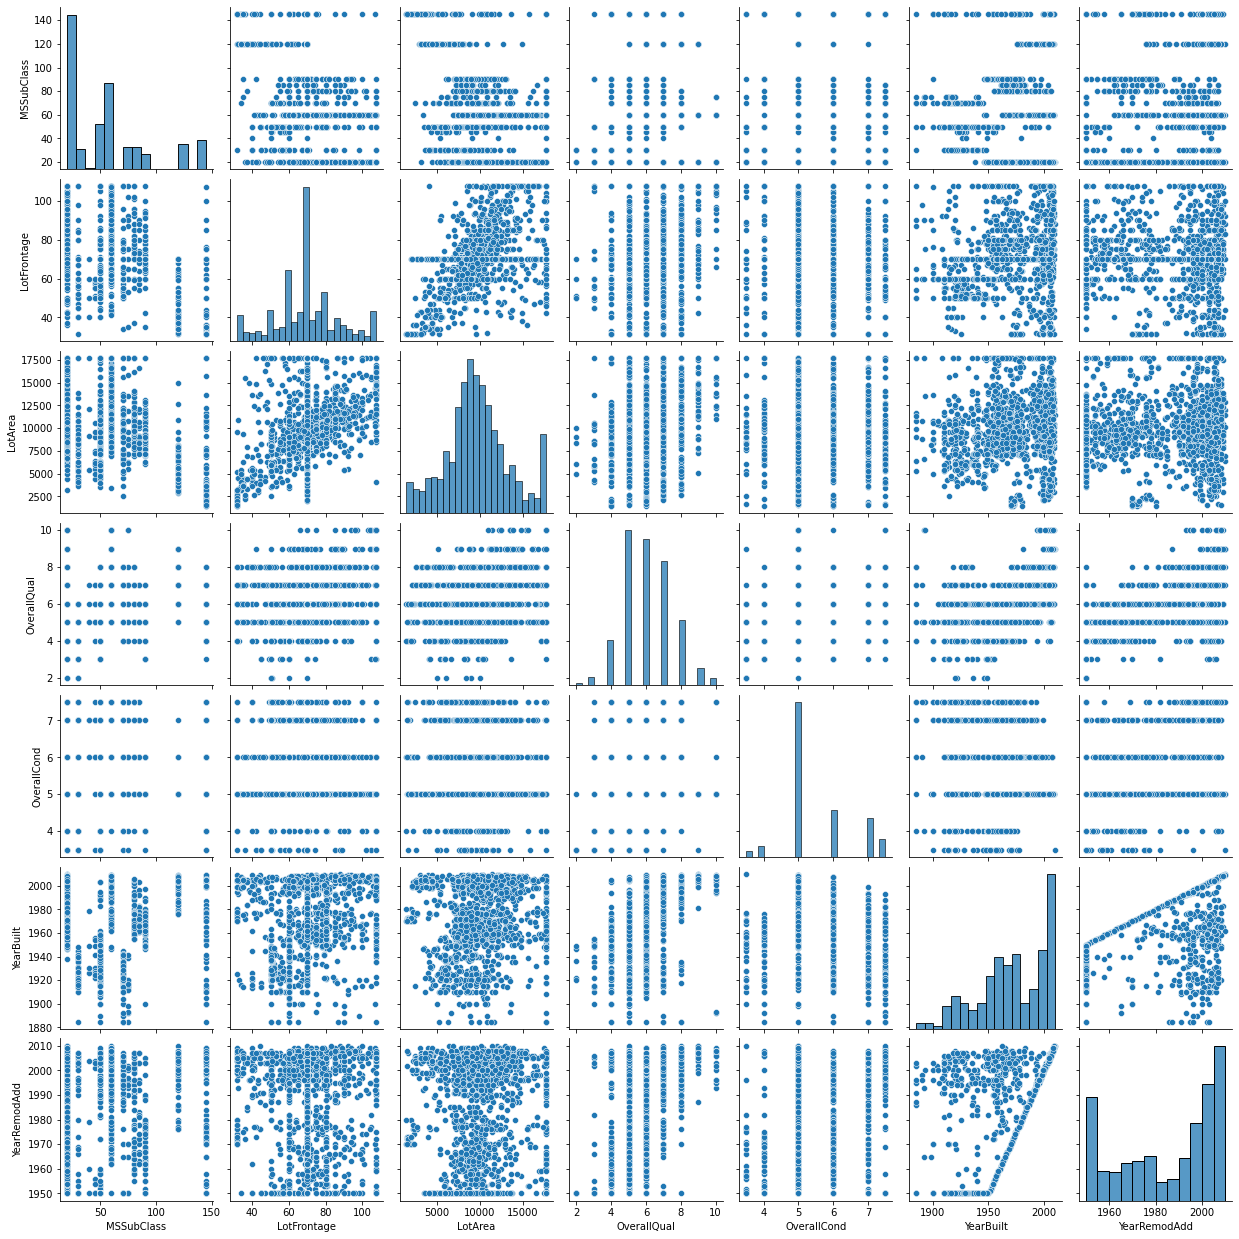

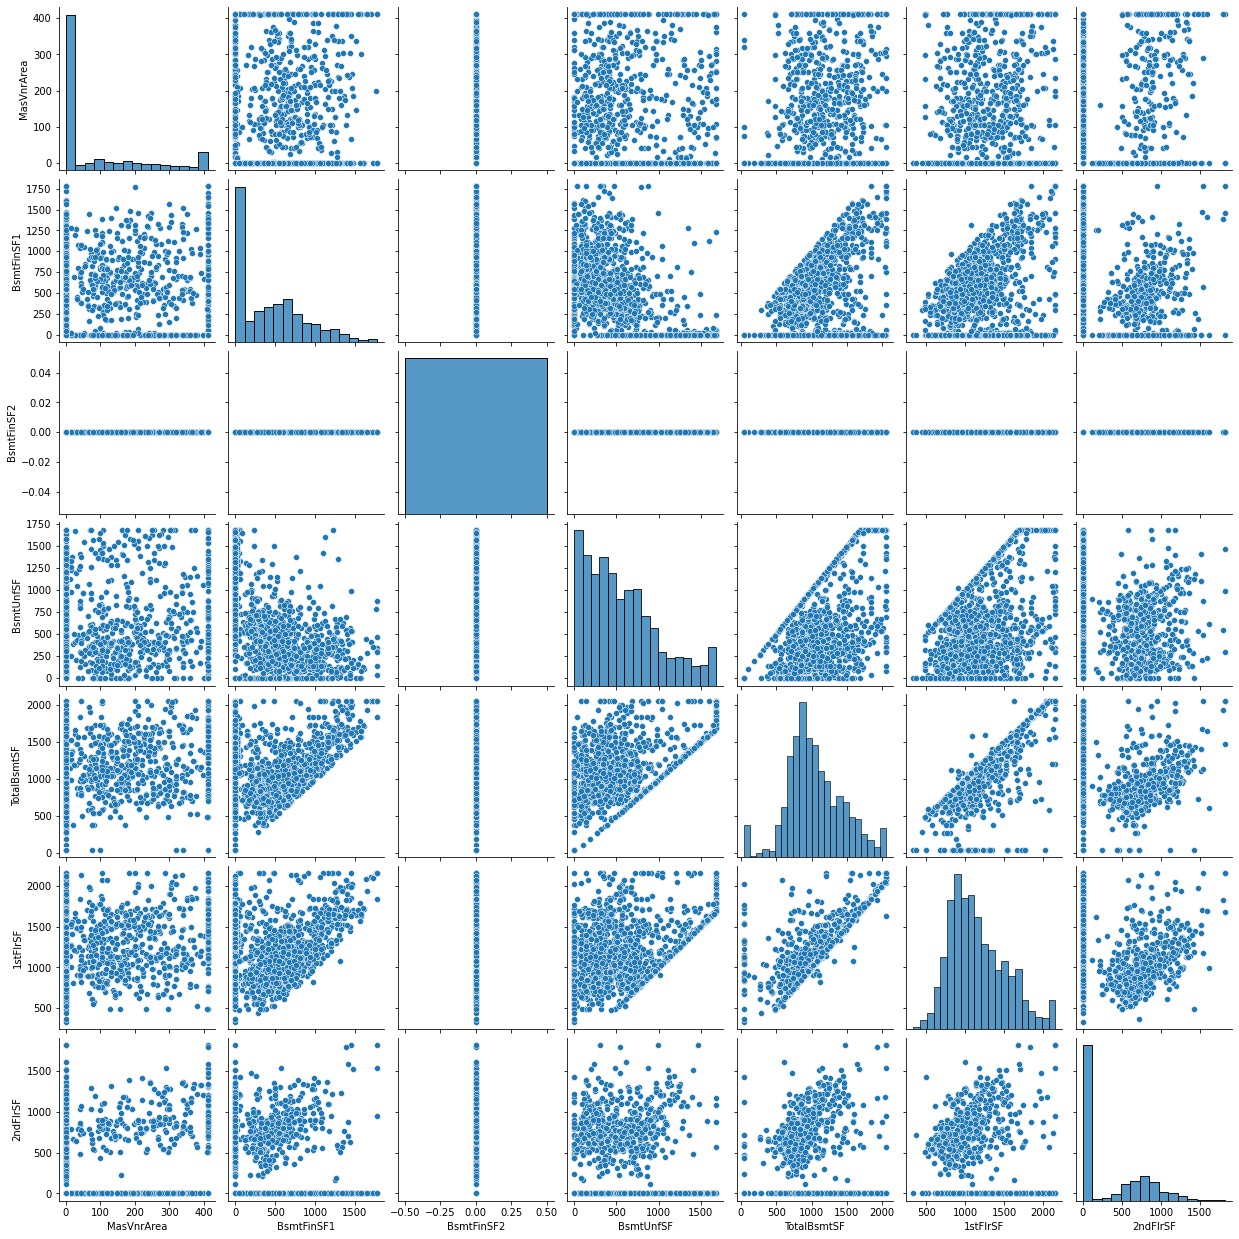

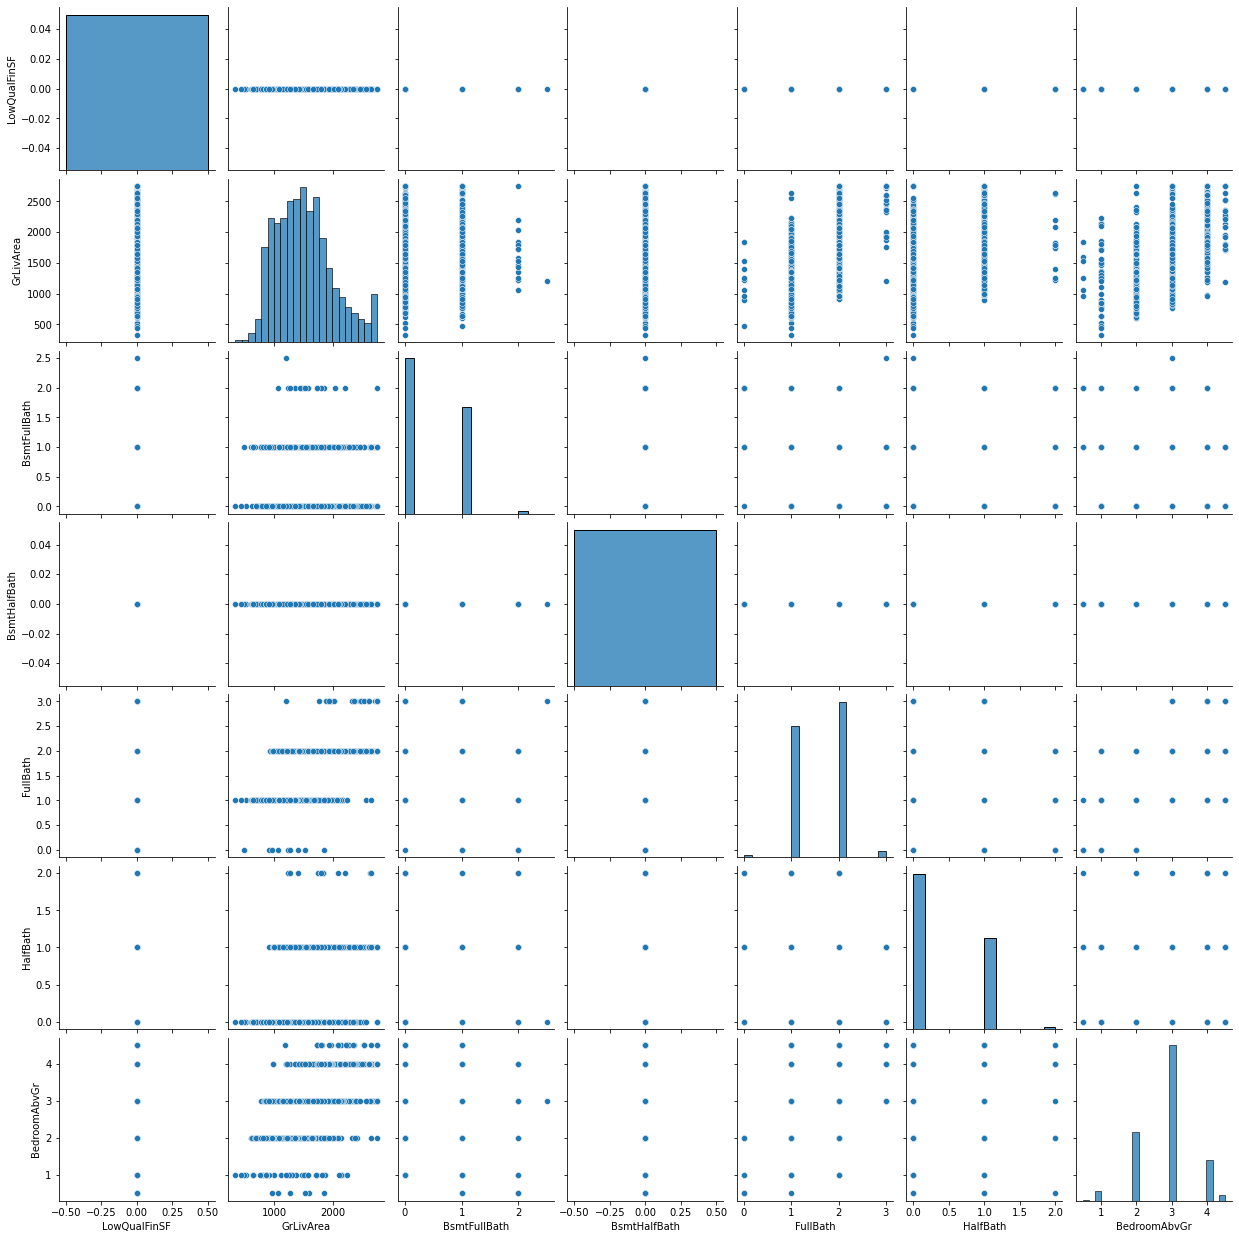

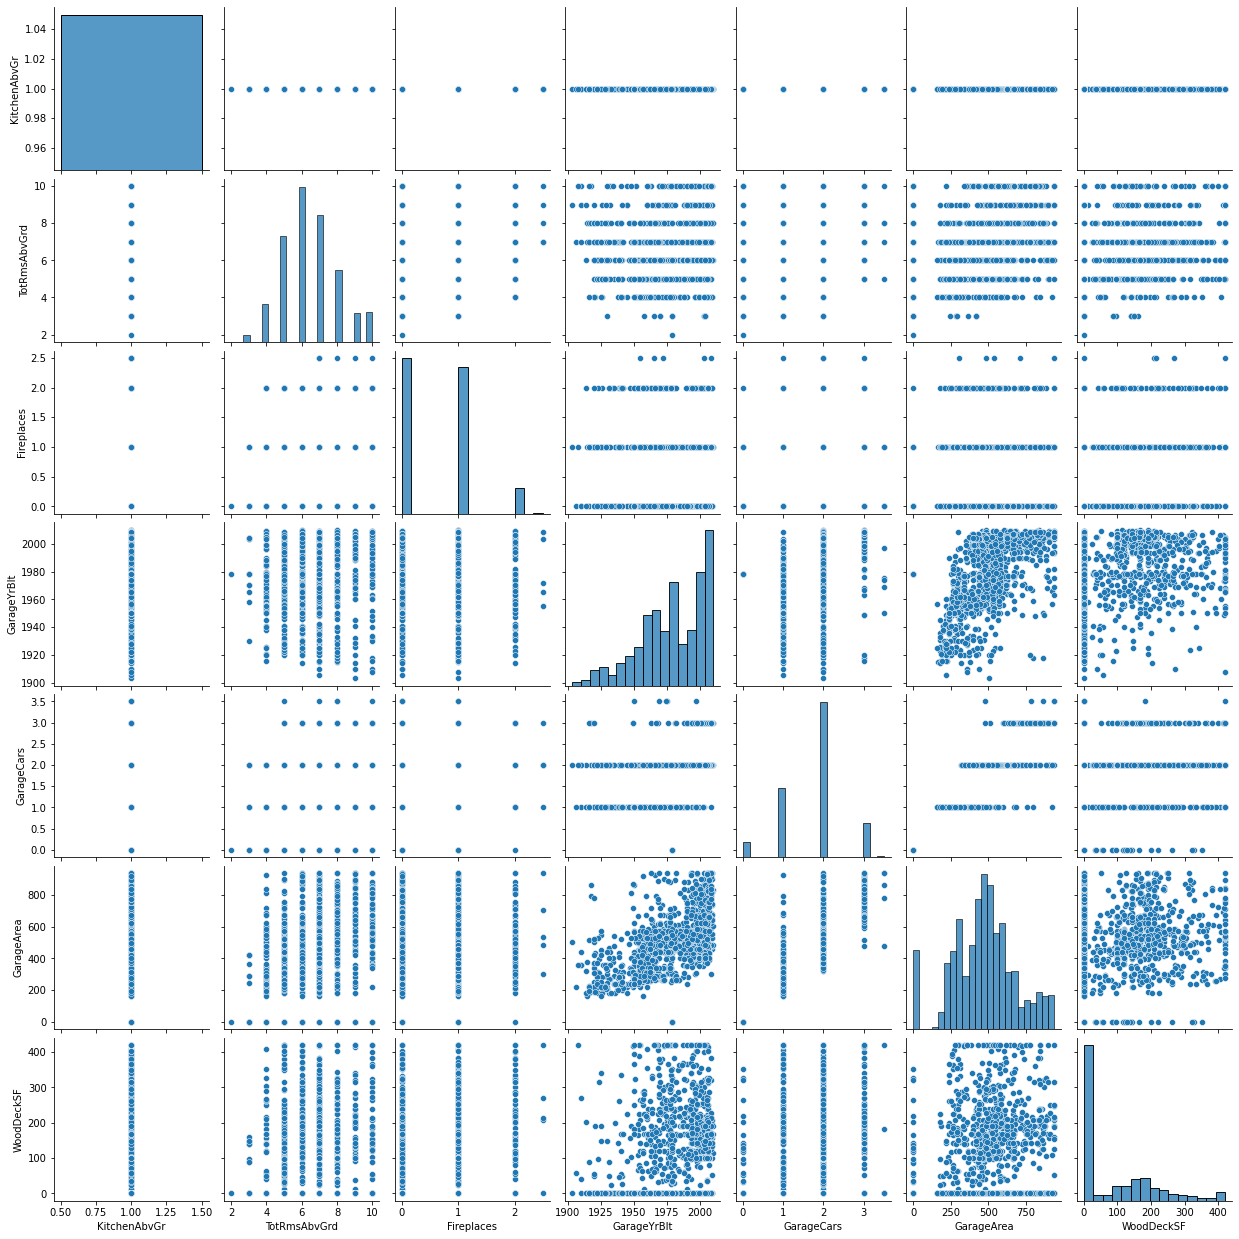

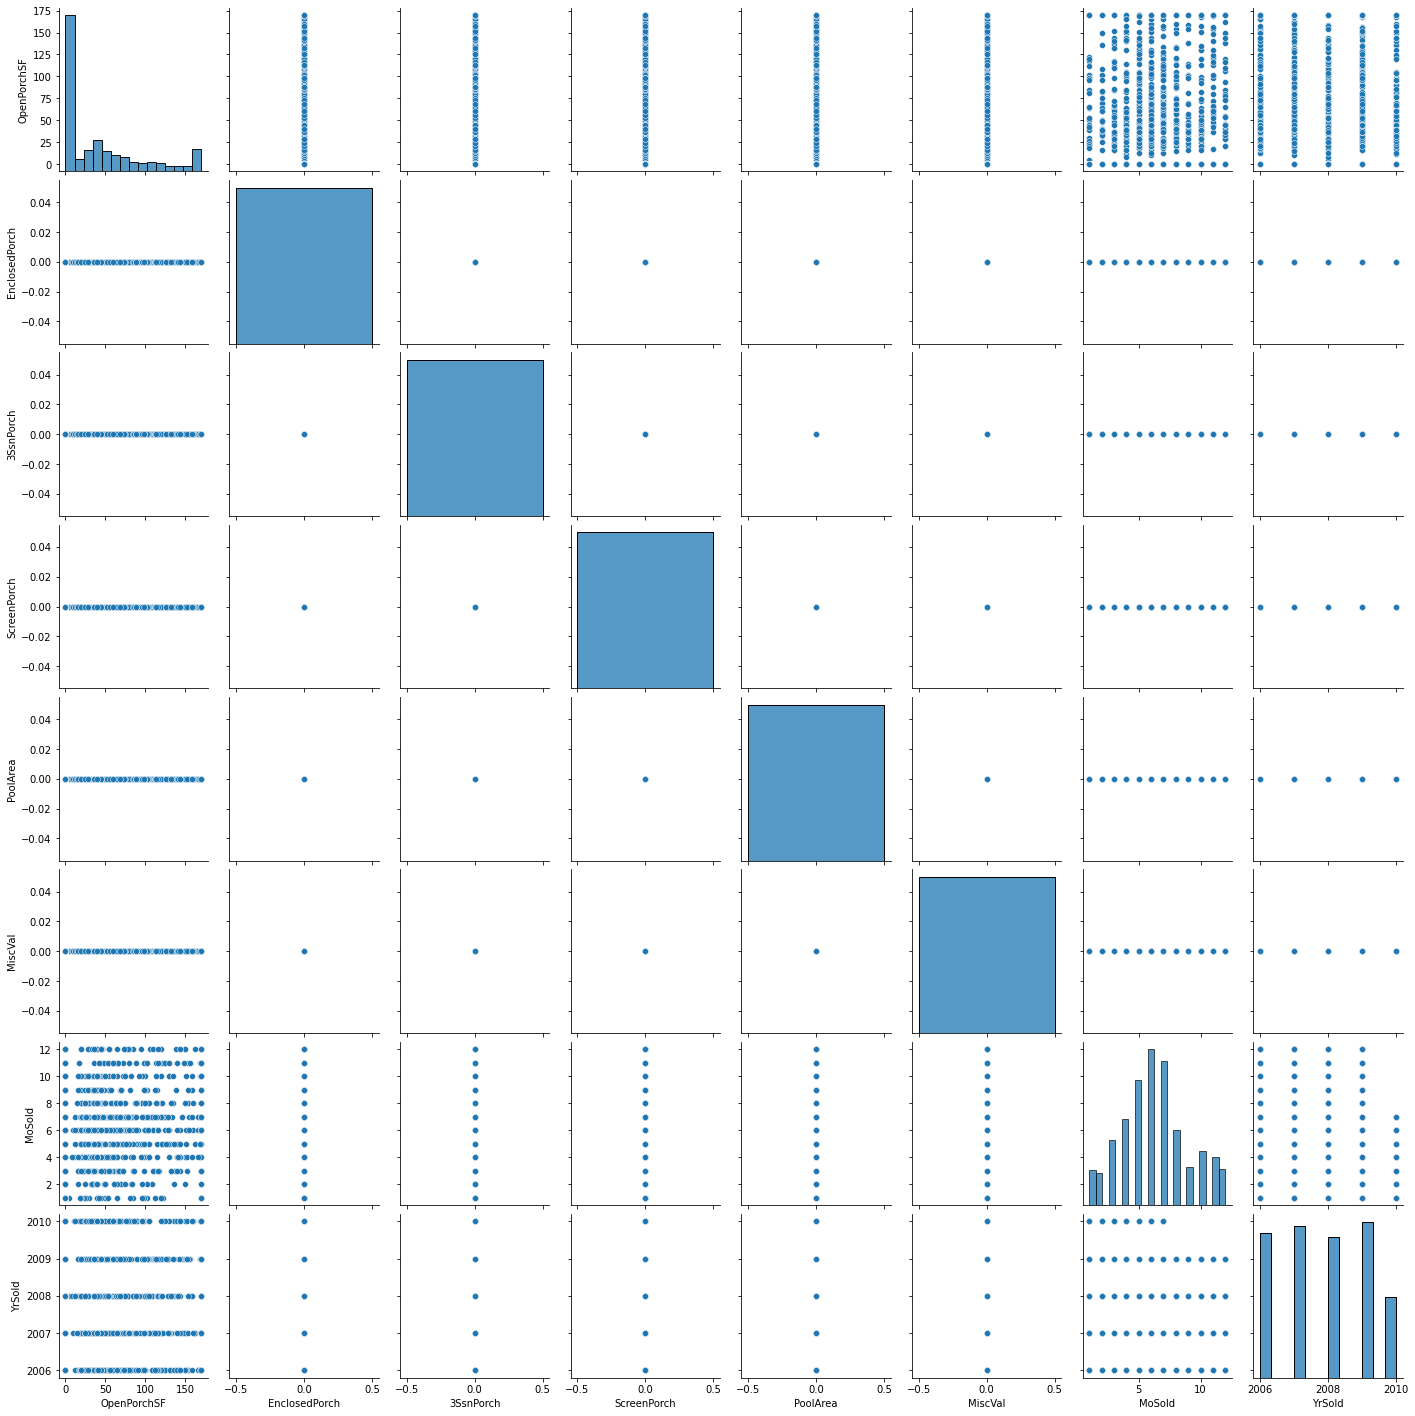

In [20]:
lin = np.linspace(0,len(df_train_num.columns),math.floor(len(df_train_num.columns)/6))
for i in range(len(lin)-1):
    columns = df_train_num.columns[int(lin[i]):int(lin[i+1])]
    sns.pairplot(df_train_num[columns])
plt.show()

Para ilustrar mejor el comportamiento de las variables veamos los gráficos de densidad de cada una. 

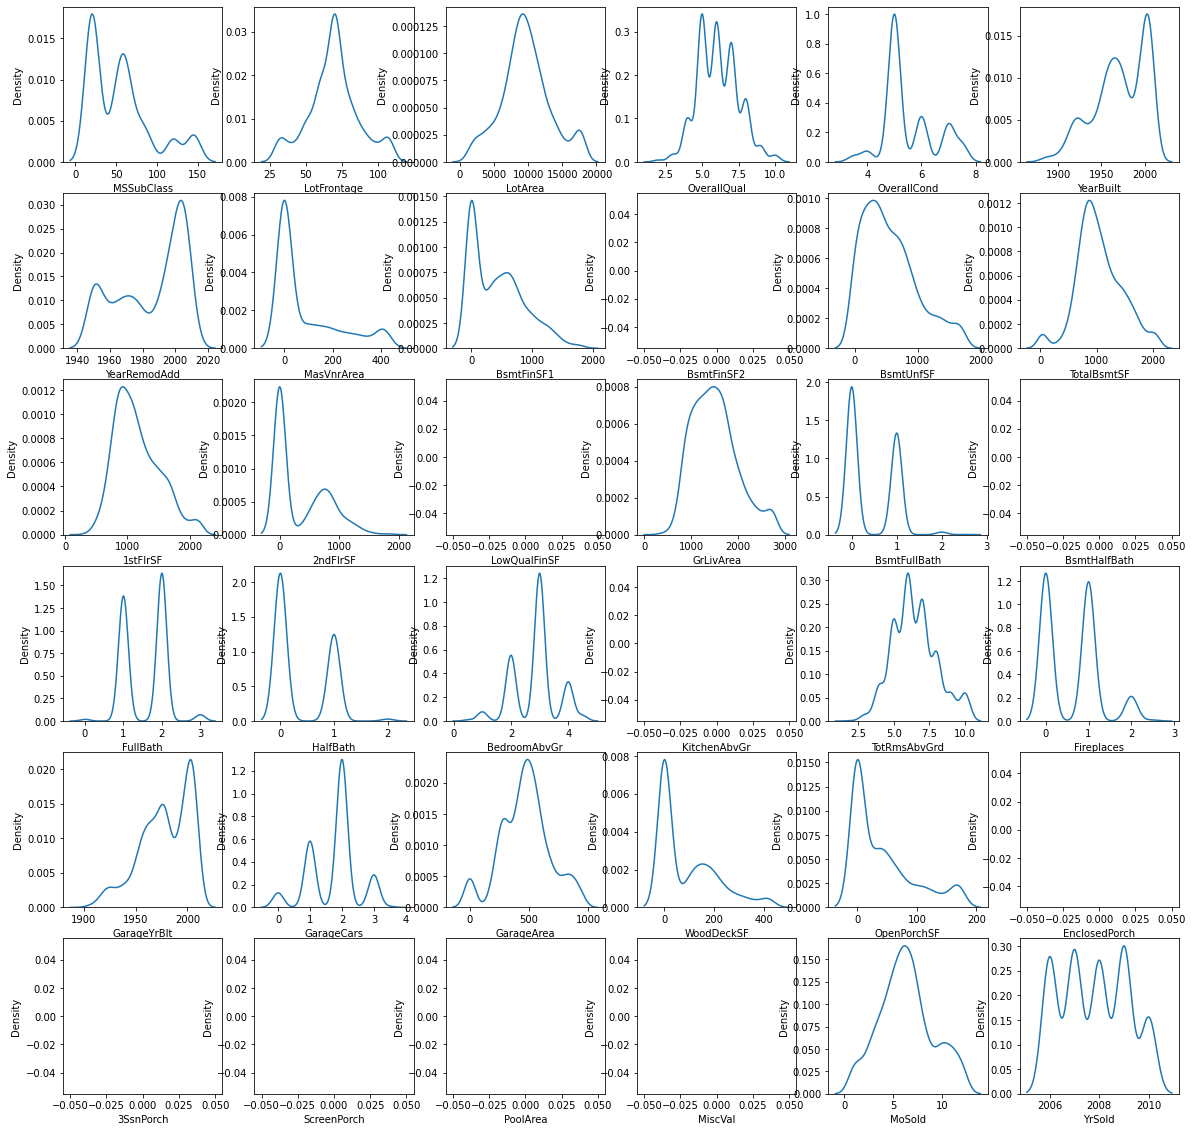

In [21]:
fig,ax = plt.subplots(6,6,figsize=(20,20))
column_matrix = np.array(np.array(list(df_train_num.columns))).reshape(6,6) # esta matriz se usa para obtener los índices del subplot
for i in range(column_matrix.shape[0]):
    for j in range(column_matrix.shape[1]):
        sns.kdeplot(df_train_num[column_matrix[i,j]],ax=ax[i,j])

Algo equivalente, pero con gráficas de barras, ilustra el comportamiento de las variables categóricas. 

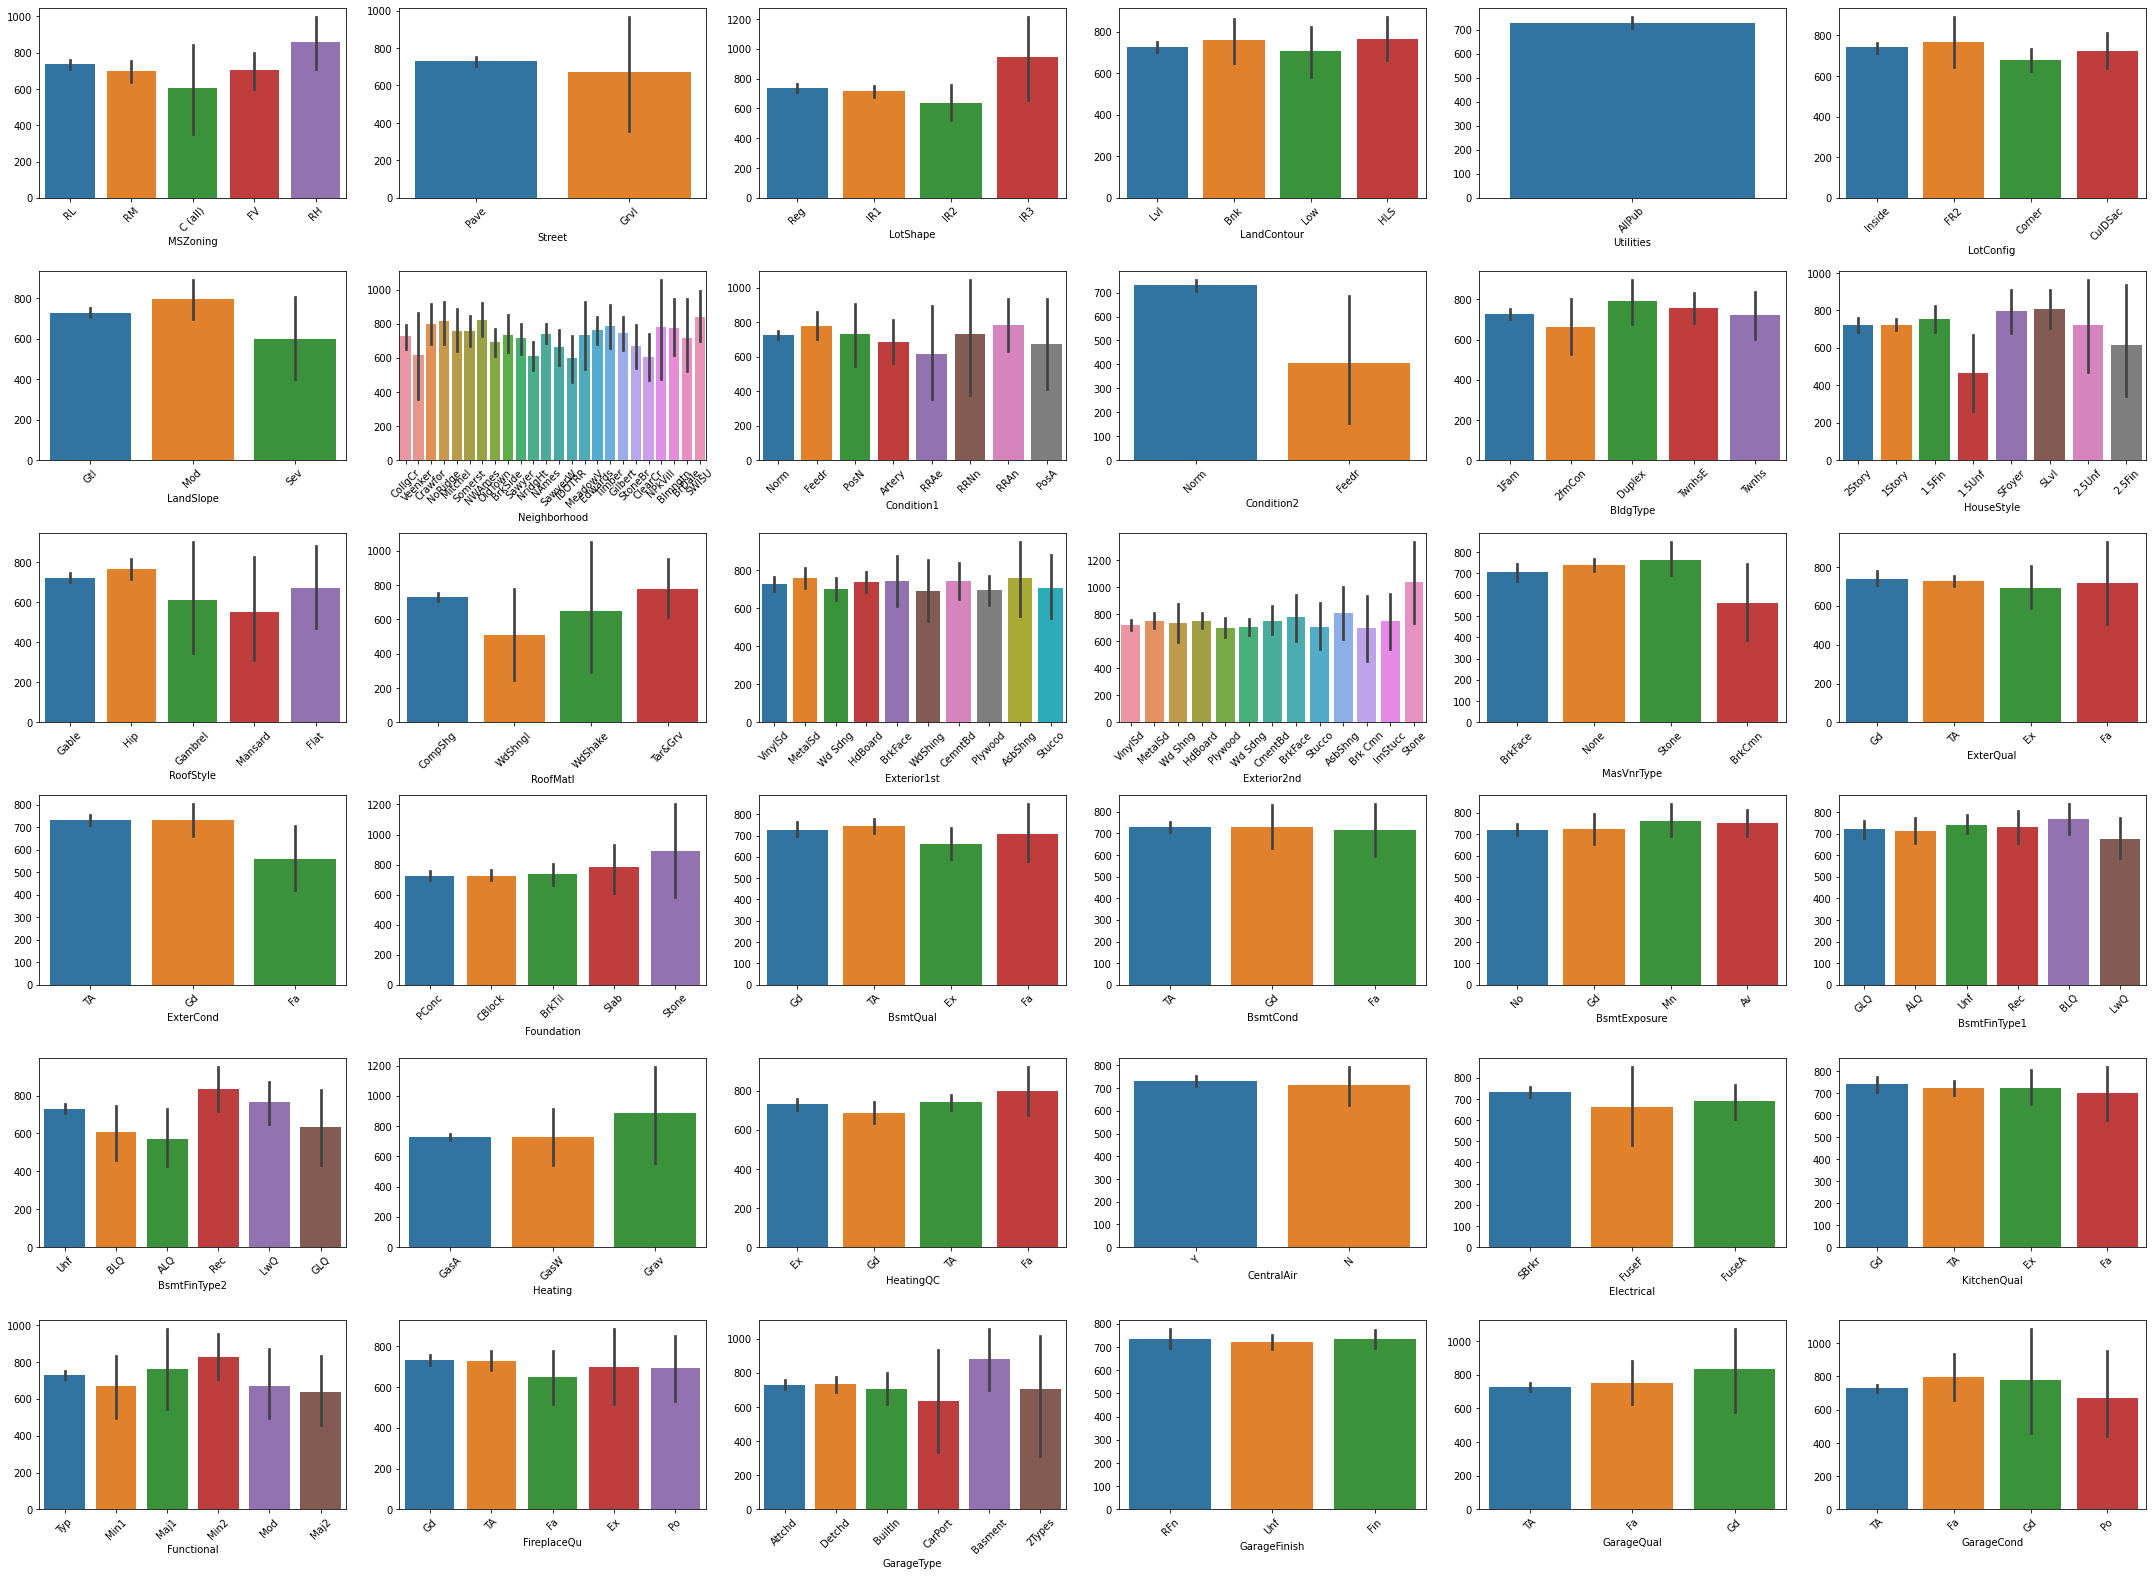

In [22]:
fig,ax = plt.subplots(6,6,figsize=(30,22))

column_matrix = np.array(np.array(list(df_train_cat.columns[:36]))).reshape(6,6) # esta matriz se usa para obtener los índices del subplot
for i in range(column_matrix.shape[0]):
        for j in range(column_matrix.shape[1]):
            sns.barplot(y=df_train_cat[column_matrix[i,j]].index,x=df_train_cat[column_matrix[i,j]],ax=ax[i,j])
            ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=45)
plt.tight_layout()    

# Clase 14

### Escalamiento para variables continuas
Las variables continuas pueden tener una escala muy diferente, lo cual puede afectar la precisión y eficacia del modelo, por lo que aplicaremos una [estandarización](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), consistente en restar la media y dividir entre la varianza z = (x - u) / s, esto está implementado en **StandardScaler** en la librería **scikit-learn**.

In [23]:
def escalamiento(df):
    scale= StandardScaler()
    scaled_df = scale.fit_transform(df)
    df = pd.DataFrame(scaled_df,columns=df.columns)
    return df

df_train_num = escalamiento(df_train_num)
df_test_num = escalamiento(df_test_num)

### Encoding para variables categóricas
Muchos modelos no admiten variables categóricas en su implementación. Por eso necesitamos una ténica de codificación. convirtiendo las variables categóricas en dummies, es decir, por cada columna se generarán nuevas columnas, una para cada categoría de la misma. Estas columnas nuevas estarán compuestas de 0 y 1. Será 1 en los índices donde la entrada coincida con la categoría que ahora da nombre a la columna. Esto lo lograremos con la función [One-Hot-Encoding](https://www.brutalk.com/es/noticias/brutalk-blog/ver/por-que-one-hot-encode-data-en-machine-learning-60471b11bb4df). Para ello utilizamos primero la función **Label Encoder**, para hacer una codificación con enteros (donde a cada categoría se le asigna un entero) y luego cada una de estas categorías pasará a ser una columna de la base de datos cuyos campos son binarios (1 si la persona en el índice correspondiente está en esa categoría y 0 si no), con la función **OneHotEncoder**. 

In [24]:
columnas_categoricas = df_train_cat.columns 

def encoding(df):
    df_lenc = df.copy() 
    dict_list = {}

    labelencoder = LabelEncoder() # labelencoder
    for col in df:
        df_lenc[col] = labelencoder.fit_transform(df_lenc[col])
        dict_list[col] = dict(zip(df_lenc[col],df[col]))

    # one-hot-encoder
    enc = OneHotEncoder()
    enc_df = pd.DataFrame()
    for col in df.columns:
        temp = pd.DataFrame(enc.fit_transform(df_lenc[[col]]).toarray())
        # recuperar los nombres de las categorías
        temp.rename(columns=dict(zip(list(range(len(temp.columns))),[str(col)+'_'+str(dict_list[col][i]) for i in list(range(len(temp.columns)))])),inplace=True)
        enc_df = pd.concat([enc_df,temp],axis=1)
    return enc_df

df_train_cat = encoding(df_train_cat)
df_test_cat = encoding(df_test_cat)

Veamos cuántas columnas quedan en "train" y cuántas en "test", ya que al implementar el modelo es importante que tengan la misma cantidad de columnas. 

In [25]:
print(df_train_cat.shape,df_test_cat.shape) 

(1460, 198) (1459, 223)


Hay más columnas en df_test_cat, esto puede deberse a que había categorías en las columnas de "df_test_cat" antes del encoding, que no existían en "df_train_cat", quizás debido a que así eran originalmente, o a resultados diferentes en el tratamiento de outliers. Estas columnas que no coinciden serán eliminadas en la siguiente celda. 

In [26]:
columns = [col for col in df_test_cat.columns if col in df_train_cat.columns]
df_train_cat = df_train_cat[columns]
df_test_cat = df_test_cat[columns]

Por último, llamaremos "X" a la base de datos con todas las variables explicativas (numéricas y categóricas) juntas y "y" a la columna con la variable objetivo. 
Seguidamente usaremos "train_test_split" para dividir el total de datos en dos subconjuntos: entrenamiento y prueba, los usaremos para poder entrenar y evaluar los modelos respectivamente. 

In [27]:
X = pd.concat([df_train_num,df_train_cat], axis=1)
y = df_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Clase 15

## Modelos

### Regresión lineal

Comenzaremos con una regresión lineal, definimos el modelo, lo entrenamos con la funión "fit" y el conjunto de entrenamiento, y a continuación predecimos la variable objetivo en el subconjunto de prueba. Comparando la predicción con los valors reales de y_test, obtenemos con la ayuda de dos métricas diferentes la precisión del modelo. La primera métrica es R2, el modelo es más preciso mientras más cercano a uno sera R2. Además hallamos el error absoluto medio, el cual hemos divido entre la media de los valores reales, para convertirlo en un error relativo medio. 

In [28]:
LR = LinearRegression()
LR = LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
print("R^2 :",r2_score(y_test, LR_pred))
print('Mean relative error :',mean_absolute_error(y_test, LR_pred)/y_test.mean())

R^2 : 0.8494430625457708
Mean relative error : 0.11297458123611981


### Árbol de decisión

La precisión de la regresión no es muy buena, quizás debido a que la estructura de las relaciones entre los datos no viene dada en forma aproximada a la lineal. Implementemos un árbol de decisión:

In [29]:
dct = tree.DecisionTreeRegressor()
dct = dct.fit(X_train, y_train)
dct_pred = dct.predict((X_test))
print("R^2 :",r2_score(y_test, dct_pred))
print('Mean relative error :',mean_absolute_error(y_test, dct_pred)/y_test.mean())

R^2 : 0.70068213692726
Mean relative error : 0.14757968403487814


### Bosques aleatorios o random forest

Tampoco la precisión de los árboles de decisión fue en este caso muy buena. Intentemos un par de métodos de ensamble basados en árboles para intentar mejorarla.

In [30]:
RF = RandomForestRegressor().fit(X_train,y_train)
RF_pred =  RF.predict(X_test) 
print("R^2 :",r2_score(y_test, RF_pred))
print('Mean relative error :',mean_absolute_error(y_test, RF_pred)/y_test.mean())

R^2 : 0.9041990565121298
Mean relative error : 0.09505186752513162


### Gradient Boosting

In [31]:
XGB = GradientBoostingRegressor().fit(X_train,y_train)
XGB_pred =  XGB.predict(X_test) 
print("R^2 :",r2_score(y_test, XGB_pred))
print('Mean relative error :',mean_absolute_error(y_test, XGB_pred)/y_test.mean())

R^2 : 0.9271474328424154
Mean relative error : 0.08539584031766148


Como podemos observar, ambos modelos tienen una precisión muy alta, y un error relativo bajo. 

## Predicciones

Utilizaremos los dos mejores métodos probados para predecir la variable objetivo en df_test. Para ello, volveremos a entrenar los modelos, ahora con todo el dataframe de df_train, y luego realizaremos la predicción.

In [32]:
X_train = X
y_train = df_train[target]

X_test = pd.concat([df_test_num,df_test_cat], axis=1)

In [33]:
RF = RandomForestRegressor().fit(X_train,y_train)
RF_prediction =  RF.predict(X_test) 

In [34]:
XGB = GradientBoostingRegressor().fit(X_train,y_train)
XGB_prediction =  XGB.predict(X_test) 

Veamos el R^2 y el error relativo entre estas dos predicciones. Tomaremos como la "real" la predicción de XGB porque fue el modelo más preciso anteriormente. 

In [35]:
print("R^2 :",r2_score(XGB_prediction, RF_prediction))
print('Mean relative error :',mean_absolute_error(XGB_prediction, RF_prediction)/XGB_prediction.mean())

R^2 : 0.9729701140786082
Mean relative error : 0.0497079462446798


Vemos que las predicciones de ambos modelos se parecen mucho. Lo cual es una muy buena señal. A continuación grafiquemos algunos de estos resultados: 

#### Predicciones de XGB y RF

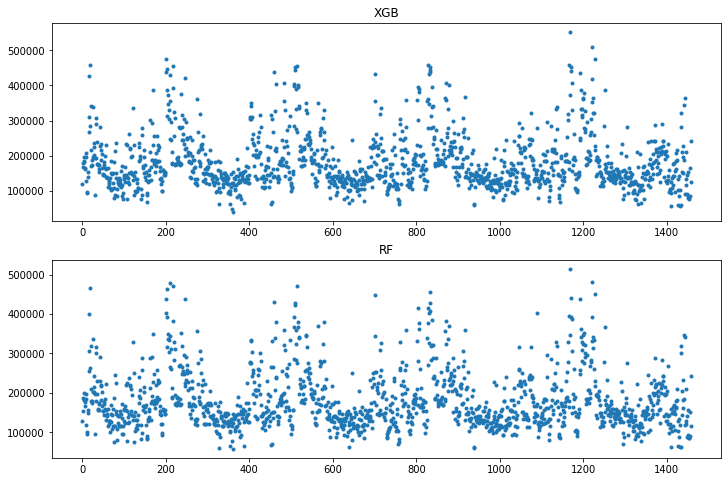

In [36]:
fig,ax = plt.subplots(2,1,figsize=(12,8))
ax[0].plot(XGB_prediction,'.')
ax[0].set_title('XGB')
ax[1].plot(RF_prediction,'.')
ax[1].set_title('RF')
plt.show()

#### Errores relativos en la predicción y en las pruebas anteriores.

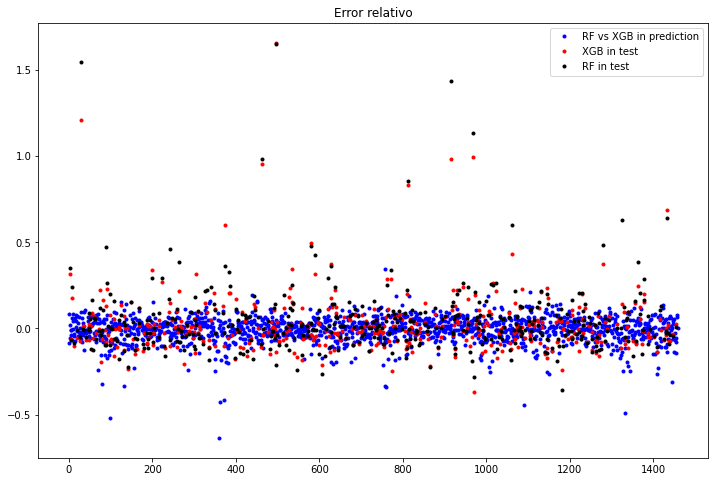

In [37]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
rel_error = (XGB_prediction-RF_prediction)/XGB_prediction
ax.plot(rel_error,'.',color='b',label = 'RF vs XGB in prediction')
rel_error = (XGB_pred-y_test)/y_test
ax.plot(rel_error,'.',color='r',label = 'XGB in test')
rel_error = (RF_pred-y_test)/y_test
ax.plot(rel_error,'.',color='k',label = 'RF in test')
plt.title('Error relativo')
plt.legend()
plt.show()

# Prescripción

En esta parte de los ejemplos realizaremos una de las formas de prescripción más sencillas, veremos cómo podemos saber qué variables tienen más influencia en la variable objetivo, y en qué sentido se puede modificar para aumentar o disminuir el precio de las casas. 
Primero, utilizamos la función **feature_importances_** para encontrar la influencia de cada variable explicativa en la variable objetivo. Esta importancia se basa en qué tan fundamental fue cada columna en la decisión tomada por los árboles que componen el modelo.  

In [38]:
RF_importance = RF.feature_importances_
RF_importance = pd.DataFrame({'Variable':X_train.columns,'Importance':RF_importance})
RF_importance

Variable  Importance
0               MSSubClass    0.001357
1              LotFrontage    0.005378
2                  LotArea    0.011101
3              OverallQual    0.579709
4              OverallCond    0.003962
..                     ...         ...
228  SaleCondition_Abnorml    0.000259
229   SaleCondition_Alloca    0.000031
230   SaleCondition_Family    0.000225
231   SaleCondition_Normal    0.000442
232  SaleCondition_Partial    0.000400

[233 rows x 2 columns]

### Importancia de las variables según Random Forest  
En la columna variable de RF_importance podemos ver que aún las variables categóricas permanecen como las dummies que construimos, y la importancia está dada para cada dummy. En realidad, nosotros quisieramos tener un coeficiente por cada variable. En el siguiente código calcularemos esto a partir de la importancia de las dummies, calculando una media ponderada de estas, como pesos usaremos la cantidad de entradas que presentan esta característica, es decir la cantidad de unos que hay en la columna dummy. 

In [39]:
def totalimportance(df_cat,columnas_categoricas,importance):    
    imp_numericas = importance[:36]
    #Agrupa las importancias dadas por variable + categoría en una importancia para toda la variable tomando la importancia de cada una por las veces que aparece (lo cual actúa como "weight") entre el total de casos
    dic = {}
    for column in columnas_categoricas:
        dic[column] = 0
        for col in df_cat.columns:
            if column in col:
                cantidad_categoria = df_cat[col].value_counts()[1] # cantidad de entradas correspondientes a la categoría
                N = len(df_cat.index) # tamaño de la muestra
                indices =importance[importance['Variable']==col].index # indices del dataframe importance cuyos valores en Variable coinciden con las categorías de cada paso del ciclo
                importancia_categoria = importance.loc[indices,'Importance'].values #Importancia de la categoría en cuestión  
                dic[column] += importancia_categoria * cantidad_categoria/N*100 # Construcción de la importancia de toda variable sumando la importancia de sus categorías multiplicada por los pesos conformados por (cantidad de entradas en la categoría)/(total de la muestra)
    
    total_importance = pd.DataFrame(dic).transpose().reset_index().rename(columns={'index':'Variable',0:'Importance'})            
    total_importance = pd.concat([total_importance,imp_numericas],axis=0)
    total_importance = total_importance.sort_values(by=['Importance'],ascending=False)
    total_importance = round(total_importance,4)                 
    return total_importance

total_importance = totalimportance(df_train_cat,columnas_categoricas,RF_importance)
total_importance

Variable  Importance
3    OverallQual      0.5797
33  GarageFinish      0.2026
32    GarageType      0.1451
27    CentralAir      0.1381
20      BsmtQual      0.1289
..           ...         ...
30     3SsnPorch      0.0000
31   ScreenPorch      0.0000
32      PoolArea      0.0000
33       MiscVal      0.0000
9     BsmtFinSF2      0.0000

[75 rows x 2 columns]

Con la librería plotly, construyamos una gráfica de burbujas interactiva que pueda contener la información hallada anteriormente. 

In [40]:
import plotly.graph_objects as go
import plotly.express as px

df = total_importance.copy()

hover_text = []
bubble_size = []

for index, row in df.iterrows():
    hover_text.append(('Variable: {Variable}<br>'+
                      'Importancia_RF: {Importance}<br>'.format(Variable=row['Variable'],
                            Importance=row['Importance']
                                          )))
    bubble_size.append(10*row['Importance'])

df['text'] = hover_text
df['size'] = bubble_size
sizeref = 2.*max(df['size'])/(100**2)


# Create figure
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=df['Variable'], y=df['Importance'],
    #    name=continent_name, text=continent['text'],
     #   marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Variables & Importancia',
    xaxis=dict(
        title='index',
        gridcolor='white',
#        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Importance',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

### Coeficientes de regresión  

La información vista más arriba nos permite saber las variables que se deberán modificar para cambiar la decisión del modelo, sin embargo no nos dice en qué sentido se deberá cambiar ni cuánto. Eso podemos saberlo con los coeficientes de regresión. El problema es que la regresión lineal no tenía una buena precisión entonces puede que los coeficientes no sean tan confiables. 
Utilizaremos la siguiente técnica: convertir nuestra variable objetivo en binaria, siendo 1 si el precio está sobre la mediana y 0 en caso contrario. A continuación, volveremos a entrenar el modelo, pero ahora usando una **regresión logística**. Su precisión deberá ser calculada utilizando la función **accuracy_score** de **metrics**.

In [41]:
med = y.median() 
for i in y.index:
    if y[i] > med:
        y[i] = 1
    else:     
        y[i] = 0        

In [42]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

log = LogisticRegression()
log = log.fit(X_train,y_train)
log_pred = log.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, log_pred))

Accuracy: 0.908675799086758


 La precisión ha mejorado, ahora es momento de obtener los coeficientes de regresión. Los más grandes en valor absoluto, es decir las variables con más influencia positiva o negativa los graficaremos en una gráfica de barras. 

In [43]:
log_coef = log.coef_.flatten()
log_coef = pd.DataFrame({'Variable':X.columns,'Log_coef':log_coef})
log_coef = log_coef.sort_values(by=['Log_coef'],ascending=False)
log_coef

Variable  Log_coef
64   Neighborhood_Crawfor  1.798713
15              GrLivArea  1.470782
37            MSZoning_FV  1.142565
25             GarageCars  1.057043
231  SaleCondition_Normal  0.909656
..                    ...       ...
141          ExterQual_Ex -0.892117
65   Neighborhood_Edwards -0.897977
45           LotShape_IR3 -0.966087
70     Neighborhood_NAmes -1.032785
40            MSZoning_RM -1.150583

[233 rows x 2 columns]

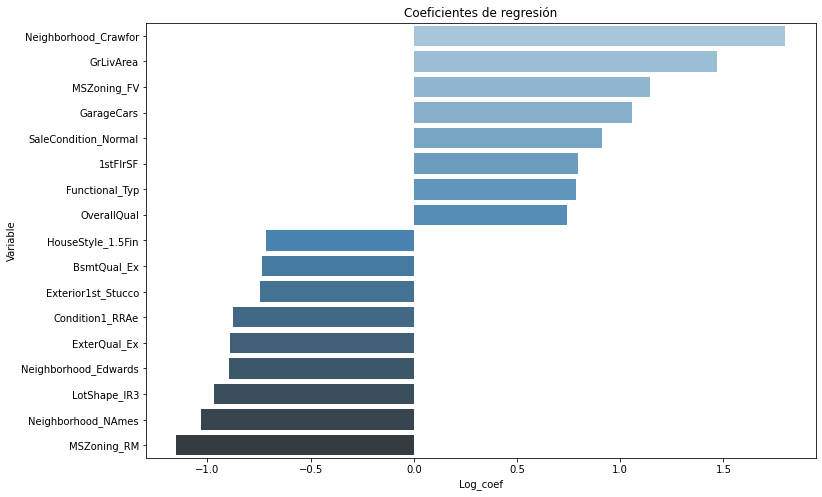

In [44]:
log_coef_plot = log_coef[abs(log_coef['Log_coef'])>0.7]
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(y=log_coef_plot['Variable'],x=log_coef_plot['Log_coef'],data=log_coef_plot,palette="Blues_d")
plt.title('Coeficientes de regresión')
plt.show()

## Conclusiones

La vecindad Crawford es la variable que más impacto tiene en que el precio de la casa esté por encima de la mediana. La superficie habitable construida es la siguiente en aportar al precio de la vivienda, es decir, cuanto más grande sea más costo. Ciertas clasificaciones de MSZoning, la clasificación de la zona, es la siguiente variable a tener en cuenta, y por otro lado también tiene influencia en negativa para otras clasificaciones. 
En general analizando los coeficientes de regresión, podemos saber qué caraterísticas se pueden modificar para modificar el precio de la casa. Aunque algunos no pueden ser modificados después de construida, otros sí tienen esa posibilidad. Y aún los que no pueden ser modificados pueden constituir una guía para posibles inversores. 